# Univariate Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
X = np.arange(1,51)
X = np.array(X).reshape((X.shape[0],-1))

In [3]:
Y = np.linspace(25,500,50)

In [4]:
Y = np.array([item + random.randint(0,50) for item in Y]).reshape(Y.shape[0],-1)

Text(0.5, 1.0, 'Given dataset')

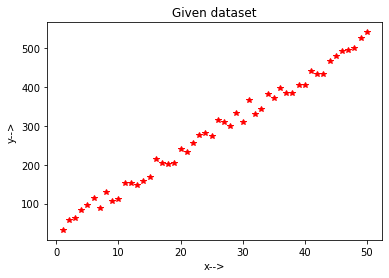

In [5]:
plt.plot(X,Y, 'r*')
plt.xlabel('x-->')
plt.ylabel('y-->')
plt.title('Given dataset')

Let us try fitting a line through the data. In other words, fit a linear regression model to the given data distribution.

### Min-max scaler

In [6]:
def min_max_scaler(X):
    """Scales the given X feature vector in the range of [0,1].
        For each feature x_j, 
            x_j_new = (x_j - x_j_min)/(x_j_max - x_j_min)"""
    X_min = np.min(X,axis = 0)
    X_max = np.max(X,axis = 0)
    return (X-X_min)/(X_max - X_min)

### Standard Scaler

In [7]:
def standard_scaler(X):
    mu = np.mean(X,axis =0)
    sd = np.std(X,axis = 0)
    return (X-mu)/sd

### Linear Regression Model

In [8]:
class LinearRegression():
    def __init__(self,theta =None):
        self.theta = theta
    
    def lengthen(self,X):
        return np.c_[np.ones((len(X),1)), X]
        
    def predict(self, X_test):
        X_test = self.lengthen(X_test)
        return np.matmul(X_test,self.theta)
    
    def h(self,X):
        return np.dot(X,self.theta)
    
    def compute_cost(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        J = (1/(2*m))* sum((self.h(X) - y)**2)
        return J
    
    def compute_gradient(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        grad_J = (1/m)* np.dot(X.T,(self.h(X)-y))
        return grad_J
    
    def fit(self, X, y, alpha, num_iters, tol = 1e-1):
        J_history = []
        self.theta = np.zeros((X.shape[1]+1,1),dtype = np.float64)
        for iteration in range(num_iters):
            J_history.append(self.compute_cost(X,y))
            if abs(J_history[-1])<tol:
                break
            grad_J = self.compute_gradient(X,y)
            self.theta = self.theta - alpha*grad_J
        
        return J_history

In [9]:
clf = LinearRegression()

In [10]:
J_history = clf.fit(X,Y,alpha= 0.001, num_iters=int(1e5), tol = 50)

In [11]:
clf.theta

array([[34.9077551 ],
       [ 9.76518607]])

In [12]:
J_hist = pd.DataFrame(J_history)

<AxesSubplot:>

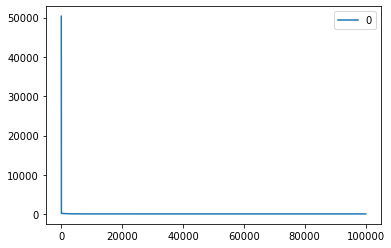

In [13]:
J_hist.plot()

In [14]:
J_history[-1]

array([96.49233421])

In [15]:
y_preds= clf.predict(X)

Text(0.5, 1.0, 'Simple Linear Regression')

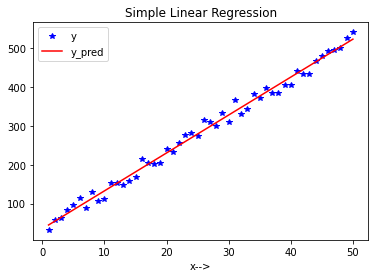

In [16]:
plt.figure(0)
plt.plot(X,Y, "b*", label = 'y')
plt.plot(X,y_preds, 'r', label = 'y_pred')
plt.xlabel('x-->')
plt.legend()
plt.title('Simple Linear Regression')

### Normal Equation Method

In [17]:
# first prepend a column of 1's to X
X = np.c_[np.ones((X.shape[0],1)), X]

In [18]:
theta_normal = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)), X.T),Y)

In [19]:
theta_normal

array([[34.9077551 ],
       [ 9.76518607]])

In [24]:
y_preds_normal = np.matmul(X,theta_normal)
print(y_preds_normal.shape)

(50, 1)


Text(0.5, 1.0, 'Simple Linear Regression')

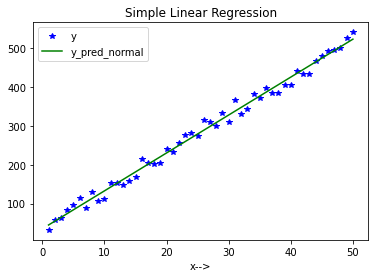

In [34]:
plt.figure(2)
plt.plot(X[:,1],Y, "b*", label = 'y')
plt.plot(X[:,1],y_preds_normal, 'g',label = 'y_pred_normal')
plt.xlabel('x-->')
plt.legend()
plt.title('Simple Linear Regression')